In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import joblib
import time
from PIL import Image, ImageEnhance, ImageOps
import matplotlib.pyplot as plt



Epoch 1/20
102/102 [==============================] - 4s 24ms/step - loss: 0.7673 - accuracy: 0.7821 - val_loss: 0.1318 - val_accuracy: 0.9588
Epoch 2/20
102/102 [==============================] - 2s 22ms/step - loss: 0.1375 - accuracy: 0.9583 - val_loss: 0.0732 - val_accuracy: 0.9772
Epoch 3/20
102/102 [==============================] - 2s 22ms/step - loss: 0.0840 - accuracy: 0.9766 - val_loss: 0.0505 - val_accuracy: 0.9889
Epoch 4/20
102/102 [==============================] - 2s 22ms/step - loss: 0.0551 - accuracy: 0.9842 - val_loss: 0.0292 - val_accuracy: 0.9908
Epoch 5/20
102/102 [==============================] - 2s 22ms/step - loss: 0.0487 - accuracy: 0.9855 - val_loss: 0.0275 - val_accuracy: 0.9932
Epoch 6/20
102/102 [==============================] - 2s 20ms/step - loss: 0.0382 - accuracy: 0.9880 - val_loss: 0.0286 - val_accuracy: 0.9883
Epoch 7/20
102/102 [==============================] - 2s 18ms/step - loss: 0.0334 - accuracy: 0.9909 - val_loss: 0.0235 - val_accuracy: 0.9938

c:\Users\dgala\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


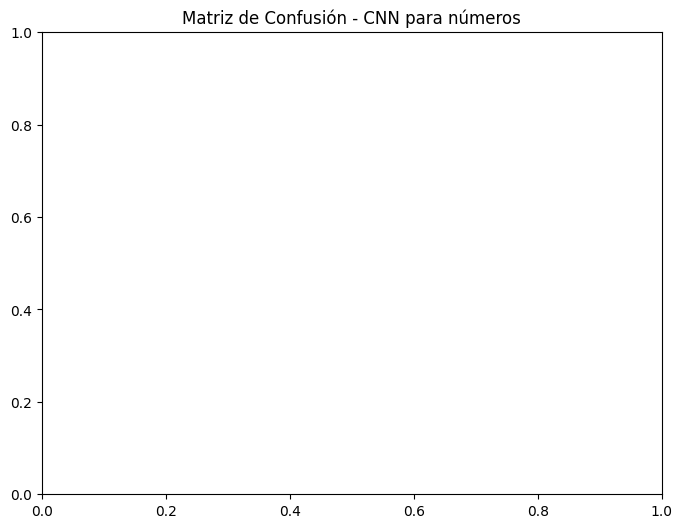

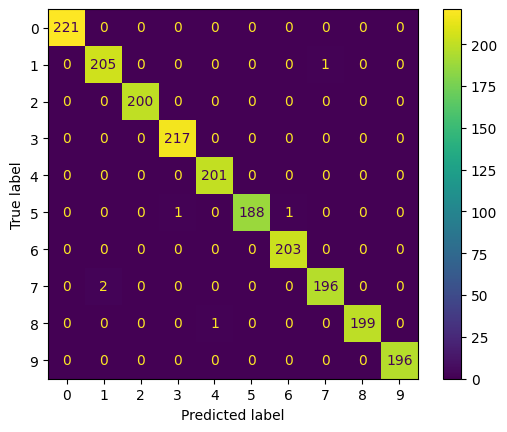

Tiempo de entrenamiento del modelo CNN para números: 37.97 segundos


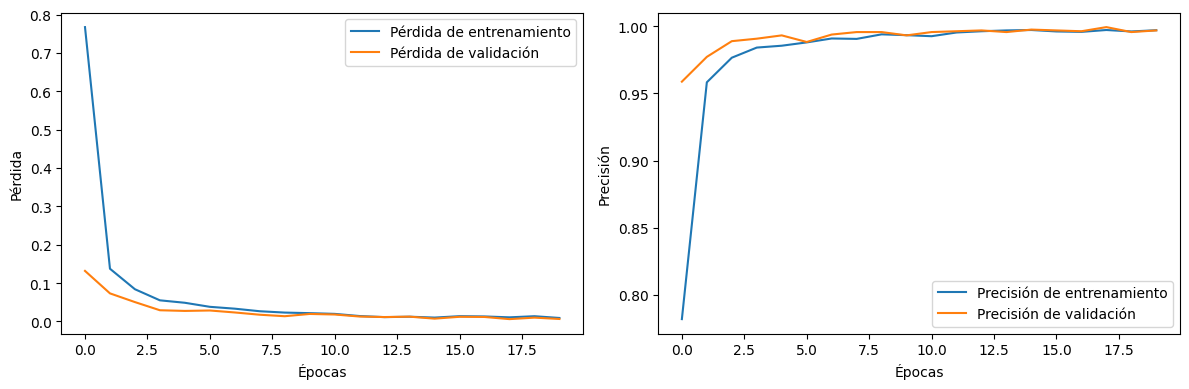

In [4]:
# Cargar datos desde el archivo CSV
dataset_numbers = np.loadtxt("dataset_numbers.csv", delimiter=',')

# Separar etiquetas y píxeles para números
labels_numbers = dataset_numbers[:, 0].astype(int)
pixels_numbers = dataset_numbers[:, 1:] / 255.0  # Normalizar píxeles

# Dividir el conjunto de datos en entrenamiento y prueba para números
X_train_numbers, X_test_numbers, y_train_numbers, y_test_numbers = train_test_split(
    pixels_numbers, labels_numbers, test_size=0.2, random_state=42
)

# Convertir las etiquetas a formato categórico
y_train_onehot_numbers = to_categorical(y_train_numbers)
y_test_onehot_numbers = to_categorical(y_test_numbers)

# Cambiar la forma de los datos para que coincida con la entrada de la CNN
X_train_reshaped_numbers = X_train_numbers.reshape(-1, 28, 28, 1)
X_test_reshaped_numbers = X_test_numbers.reshape(-1, 28, 28, 1)

# Construir la arquitectura de la CNN para números
model_numbers = Sequential()
model_numbers.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model_numbers.add(MaxPooling2D(pool_size=(2, 2)))
model_numbers.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model_numbers.add(MaxPooling2D(pool_size=(2, 2)))
model_numbers.add(Dropout(0.5))
model_numbers.add(Flatten())
model_numbers.add(Dense(128, activation='relu'))
model_numbers.add(Dense(10, activation='softmax'))  # 10 clases para números

# Compilar el modelo
model_numbers.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Medir el tiempo de entrenamiento
start_time = time.time()
# Entrenar el modelo y guardar historial del entrenamiento para números
history_numbers = model_numbers.fit(
    X_train_reshaped_numbers, y_train_onehot_numbers, epochs=20, batch_size=64, validation_split=0.2
)
end_time = time.time()
training_time_numbers = end_time - start_time

# Realizar predicciones en el conjunto de prueba para números
predictions_onehot_numbers = model_numbers.predict(X_test_reshaped_numbers)

# Convertir las predicciones a etiquetas
predicted_labels_numbers = np.argmax(predictions_onehot_numbers, axis=1)

# Calcular la precisión del modelo para números
accuracy_numbers = accuracy_score(y_test_numbers, predicted_labels_numbers)
print(f'Precisión del modelo para números: {accuracy_numbers * 100:.2f}%')

# Imprimir el nombre del archivo donde se guardó el modelo para números
model_filename_numbers = "cnn_model_numbers.h5"
model_numbers.save(model_filename_numbers)
print(f'Modelo para números guardado en: {model_filename_numbers}')

# Plotear la matriz de confusión
conf_matrix_numbers = confusion_matrix(y_test_numbers, predicted_labels_numbers)
plt.figure(figsize=(8, 6))
plt.title('Matriz de Confusión - CNN para números')

disp_numbers = ConfusionMatrixDisplay(conf_matrix_numbers)
disp_numbers.plot()
plt.show()

# Imprimir el tiempo de entrenamiento
print(f'Tiempo de entrenamiento del modelo CNN para números: {training_time_numbers:.2f} segundos')

# Visualizar el rendimiento del modelo durante el entrenamiento
plt.figure(figsize=(12, 4))

# Gráfico de pérdida
plt.subplot(1, 2, 1)
plt.plot(history_numbers.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history_numbers.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# Gráfico de precisión
plt.subplot(1, 2, 2)
plt.plot(history_numbers.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history_numbers.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.tight_layout()
plt.show()

c:\Users\dgala\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/20
265/265 [==============================] - 5s 17ms/step - loss: 1.0716 - accuracy: 0.7139 - val_loss: 0.3561 - val_accuracy: 0.9089
Epoch 2/20
265/265 [==============================] - 4s 16ms/step - loss: 0.3564 - accuracy: 0.9053 - val_loss: 0.2746 - val_accuracy: 0.9252
Epoch 3/20
265/265 [==============================] - 4s 15ms/step - loss: 0.2671 - accuracy: 0.9269 - val_loss: 0.2100 - val_accuracy: 0.9484
Epoch 4/20
265/265 [==============================] - 4s 15ms/step - loss: 0.2182 - accuracy: 0.9396 - val_loss: 0.1857 - val_accuracy: 0.9522
Epoch 5/20
265/265 [==============================] - 4s 15ms/step - loss: 0.1823 - accuracy: 0.9485 - val_loss: 0.1588 - val_accuracy: 0.9569
Epoch 6/20
265/265 [==============================] - 4s 15ms/step - loss: 0.1552 - accuracy: 0.9550 - val_loss: 0.1352 - val_accuracy: 0.9666
Epoch 7/20
265/265 [==============================] - 4s 15ms/step - loss: 0.1331 - accuracy: 0.9623 - val_loss: 0.1287 - val_accuracy: 0.9633

c:\Users\dgala\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


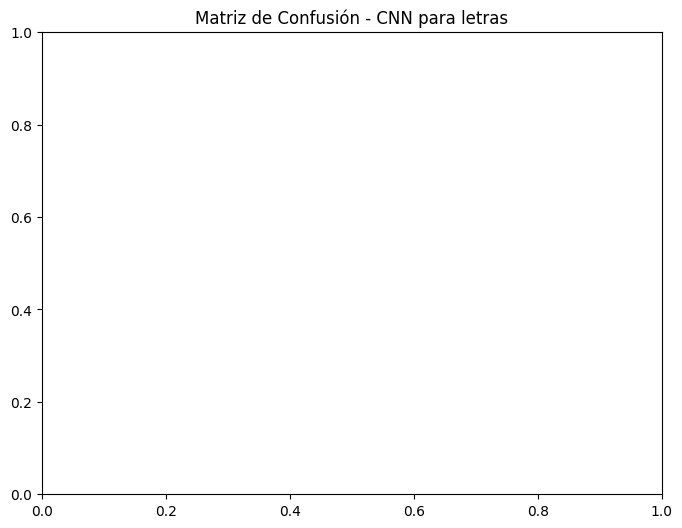

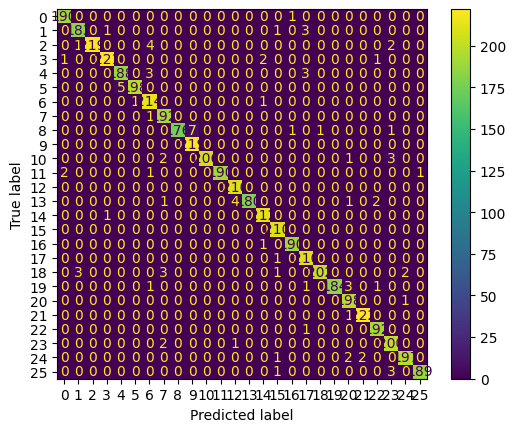

Tiempo de entrenamiento del modelo CNN para letras: 84.08 segundos


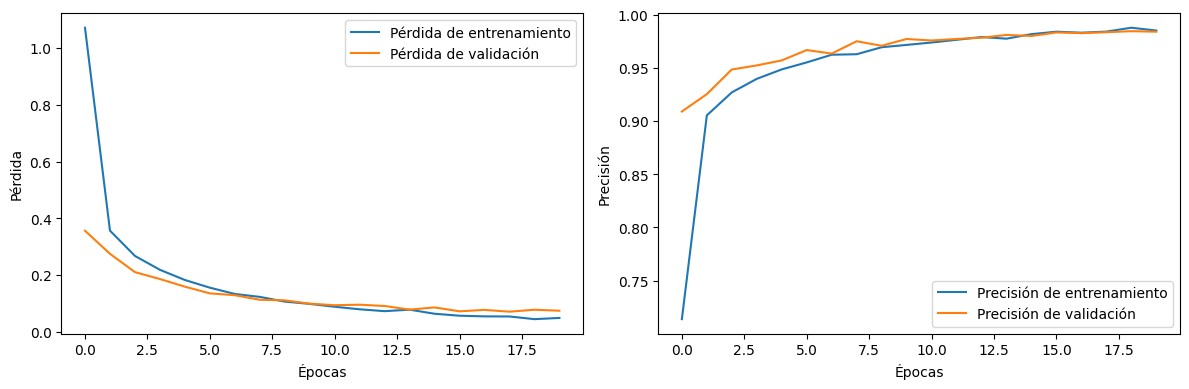

In [6]:
# Cargar datos desde el archivo CSV
dataset_letters = np.loadtxt("dataset_letters.csv", delimiter=',')

# Separar etiquetas y píxeles para letras
labels_letters = dataset_letters[:, 0].astype(int)
pixels_letters = dataset_letters[:, 1:] / 255.0  # Normalizar píxeles

# Dividir el conjunto de datos en entrenamiento y prueba para letras
X_train_letters, X_test_letters, y_train_letters, y_test_letters = train_test_split(
    pixels_letters, labels_letters, test_size=0.2, random_state=42
)

# Convertir las etiquetas a formato categórico
label_encoder_letters = LabelEncoder()
integer_encoded_letters = label_encoder_letters.fit_transform(y_train_letters)
integer_encoded_letters = integer_encoded_letters.reshape(len(integer_encoded_letters), 1)
y_train_onehot_letters = OneHotEncoder(sparse=False).fit_transform(integer_encoded_letters)

# Cambiar la forma de los datos para que coincida con la entrada de la CNN
X_train_reshaped_letters = X_train_letters.reshape(-1, 28, 28, 1)

# Construir la arquitectura de la CNN para letras
model_letters = Sequential()
model_letters.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model_letters.add(MaxPooling2D(pool_size=(2, 2)))
model_letters.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model_letters.add(MaxPooling2D(pool_size=(2, 2)))
model_letters.add(Dropout(0.5))
model_letters.add(Flatten())
model_letters.add(Dense(128, activation='relu'))
model_letters.add(Dense(26, activation='softmax'))  # 26 clases para letras

# Compilar el modelo
model_letters.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Medir el tiempo de entrenamiento
start_time = time.time()
# Entrenar el modelo y guardar historial del entrenamiento para letras
history_letters = model_letters.fit(
    X_train_reshaped_letters, y_train_onehot_letters, epochs=20, batch_size=64, validation_split=0.2
)
end_time = time.time()
training_time_letters = end_time - start_time

# Realizar predicciones en el conjunto de prueba para letras
X_test_reshaped_letters = X_test_letters.reshape(-1, 28, 28, 1)
predictions_onehot_letters = model_letters.predict(X_test_reshaped_letters)

# Convertir las predicciones a etiquetas
predicted_labels_letters = np.argmax(predictions_onehot_letters, axis=1)

# Calcular la precisión del modelo para letras
accuracy_letters = accuracy_score(y_test_letters, predicted_labels_letters)
print(f'Precisión del modelo para letras: {accuracy_letters * 100:.2f}%')

# Imprimir el nombre del archivo donde se guardó el modelo para letras
model_filename_letters = "cnn_model_letters.h5"
model_letters.save(model_filename_letters)
print(f'Modelo para letras guardado en: {model_filename_letters}')

# Plotear la matriz de confusión
conf_matrix_letters = confusion_matrix(y_test_letters, predicted_labels_letters)
plt.figure(figsize=(8, 6))
plt.title('Matriz de Confusión - CNN para letras')

disp_letters = ConfusionMatrixDisplay(conf_matrix_letters)
disp_letters.plot()
plt.show()

# Imprimir el tiempo de entrenamiento
print(f'Tiempo de entrenamiento del modelo CNN para letras: {training_time_letters:.2f} segundos')

# Visualizar el rendimiento del modelo durante el entrenamiento
plt.figure(figsize=(12, 4))

# Gráfico de pérdida
plt.subplot(1, 2, 1)
plt.plot(history_letters.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history_letters.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# Gráfico de precisión
plt.subplot(1, 2, 2)
plt.plot(history_letters.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history_letters.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.tight_layout()
plt.show()


In [7]:
# Mapeo de números a letras
number_to_letter = {10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G',
                    17: 'H', 18: 'I', 19: 'J', 20: 'K', 21: 'L', 22: 'M', 23: 'N',
                    24: 'O', 25: 'P', 26: 'Q', 27: 'R', 28: 'S', 29: 'T', 30: 'U',
                    31: 'V', 32: 'W', 33: 'X', 34: 'Y', 35: 'Z'}

def number_to_letter_mapping(number):
    return number_to_letter.get(number, str(number))

# Preprocesamiento de una única imagen de letra
def preprocess_image(input_path, output_path, vertical_padding):
    input_image = Image.open(input_path).convert('L')

    # Aumentar contraste
    enhancer = ImageEnhance.Contrast(input_image)
    contrasted_image = enhancer.enhance(2.0)

    final_image = contrasted_image

    # Redimensionar manteniendo la relación de aspecto
    aspect_ratio = final_image.width / final_image.height
    new_width = int(32 * aspect_ratio)
    resized_image = final_image.resize((new_width, 32), Image.LANCZOS)

    # Aplicar padding
    horizontal_padding = (32 - resized_image.width) // 2
    padded_image = ImageOps.expand(resized_image, border=(horizontal_padding, vertical_padding), fill='white')

    # Redimensionar al tamaño final
    final_image = padded_image.resize((32, 32), Image.LANCZOS)

    # Guardar la imagen resultante
    final_image.save(output_path)


# Predicción de la letra con el modelo CNN
def predict_letter_cnn(image_path, model):
    input_image = Image.open(image_path).convert('L')
    
    # Preprocesar la imagen
    resized_image = input_image.resize((28, 28), Image.LANCZOS)
    normalized_pixels = np.array(resized_image) / 255.0
    reshaped_pixels = normalized_pixels.reshape(1, 28, 28, 1)  # Asegúrate de tener el formato correcto
    predicted_probs = model.predict(reshaped_pixels)[0]
    
    # Obtener la etiqueta predicha
    predicted_label = np.argmax(predicted_probs)
    
    return predicted_label


# Cargar el modelo entrenado (CNN)
model_filename_cnn = "cnn_model.h5"
cnn_model = load_model(model_filename_cnn)

# Ruta de la imagen de la letra
letter_image_path = "images/3.jpg"

# Ruta para la imagen preprocesada
preprocessed_image_path = "./letra_preprocesada.png"

# Preprocesar la imagen de la letra
preprocess_image(letter_image_path, preprocessed_image_path, 4)

# Predecir la letra con el modelo CNN
predicted_label_cnn = predict_letter_cnn(preprocessed_image_path, cnn_model)

# Convertir el número de etiqueta a letra o número según corresponda
predicted_output_cnn = number_to_letter_mapping(predicted_label_cnn)

# Imprimir la letra o número predicho por la CNN
print("Carácter predicho por CNN:", predicted_output_cnn)

1/1 [==============================] - 0s 118ms/step
Carácter predicho por CNN: 3
